Email spam detection


https://www.kaggle.com/datasets/prashikmeshram37/spam-ham-dataset

Importing libraries

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import pandas as pd
import string
import numpy as np
import nltk
from nltk.corpus import stopwords
from gensim.models import Word2Vec
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
df = pd.read_csv('/content/spam_ham_dataset.csv')

In [ ]:
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [ ]:
df.shape

(5171, 4)

In [ ]:
df['label'].unique()

array(['ham', 'spam'], dtype=object)

In [ ]:
df['label_num'].unique()

array([0, 1])

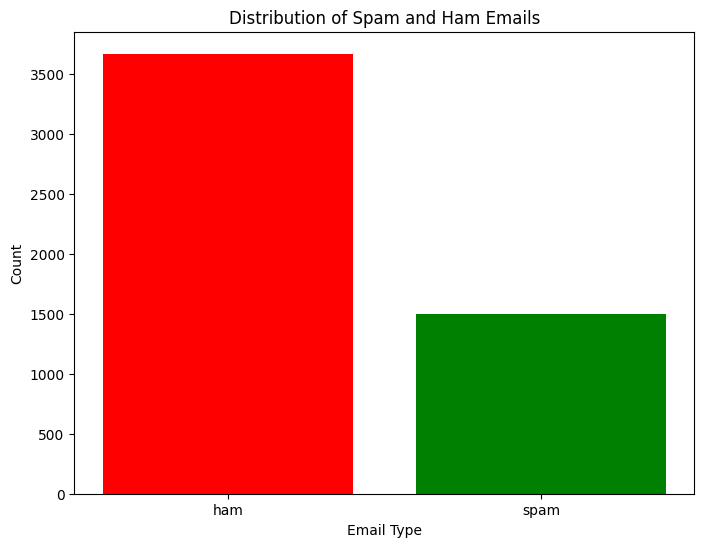

In [ ]:
label_counts = df['label'].value_counts()
# Create the bar plot
plt.figure(figsize=(8, 6))  #Fig size
plt.bar(label_counts.index, label_counts.values, color=['red', 'green'])  # colors
plt.title('Distribution of Spam and Ham Emails')
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.show()

In [ ]:
df.columns

Index(['Unnamed: 0', 'label', 'text', 'label_num'], dtype='object')

In [ ]:




# Create sets for ham and spam emails
ham_set = set(df[df['label'] == 'ham']['text'].tolist())
spam_set = set(df[df['label'] == 'spam']['text'].tolist())

# Print the sizes of the sets to verify
print(f"Number of ham emails: {len(ham_set)}")
print(f"Number of spam emails: {len(spam_set)}")

Number of ham emails: 3531
Number of spam emails: 1462


Removing stopwords from the data

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')

nltk.download('punkt')
nltk.download('stopwords')

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text.lower())
    filtered_tokens = [token for token in tokens if token.isalnum() and token not in stop_words]
    return ' '.join(filtered_tokens)

# Remove stop words from ham_set and spam_set
ham_set_no_stopwords = set(remove_stopwords(email) for email in ham_set)
spam_set_no_stopwords = set(remove_stopwords(email) for email in spam_set)

# Print the sizes of the updated sets
print(f"Number of ham emails after removing stop words: {len(ham_set_no_stopwords)}")
print(f"Number of spam emails after removing stop words: {len(spam_set_no_stopwords)}")

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Number of ham emails after removing stop words: 3427
Number of spam emails after removing stop words: 1458


Lemmatization applied for bringing the words to dictionary form

In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    tokens = word_tokenize(text)  # Tokenize the text
    lemmas = [lemmatizer.lemmatize(token) for token in tokens]  # Lemmatize each token
    return ' '.join(lemmas)  # Join the lemmas back into a string

# Lemmatize the ham and spam sets
ham_set_lemmatized = set(lemmatize_text(email) for email in ham_set_no_stopwords)
spam_set_lemmatized = set(lemmatize_text(email) for email in spam_set_no_stopwords)

# Print the sizes of the updated sets
print(f"Number of ham emails after lemmatization: {len(ham_set_lemmatized)}")
print(f"Number of spam emails after lemmatization: {len(spam_set_lemmatized)}")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


Number of ham emails after lemmatization: 3426
Number of spam emails after lemmatization: 1457


Analyzing the words that are most used in spam and ham

In [ ]:
from collections import Counter

def get_top_words(dataset, top_n=10):
    all_words = []
    for email in dataset:
        all_words.extend(email.split())  # Split emails into words and extend the list
    word_counts = Counter(all_words)  # Count word frequencies
    return word_counts.most_common(top_n)  # Get the top N words


# Get top 10 words for ham and spam
top_ham_words = get_top_words(ham_set_lemmatized, top_n=10)
top_spam_words = get_top_words(spam_set_lemmatized, top_n=10)

# Print the results
print("Top 10 words in ham emails:")
for word, count in top_ham_words:
    print(f"{word}: {count}")

print("\nTop 10 words in spam emails:")
for word, count in top_spam_words:
    print(f"{word}: {count}")

Top 10 words in ham emails:
ect: 13457
hou: 7044
enron: 6288
subject: 6017
2000: 4201
deal: 3325
gas: 2678
com: 2653
meter: 2648
please: 2577

Top 10 words in spam emails:
subject: 1615
3: 1222
com: 989
http: 981
company: 918
2: 848
u: 743
price: 709
1: 700
0: 679


In [ ]:
all_emails = list(ham_set_lemmatized) + list(spam_set_lemmatized)
labels = [0] * len(ham_set_lemmatized) + [1] * len(spam_set_lemmatized)  # 0 for ham, 1 for spam

TF-IDF vectorized

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit the vectorizer to the combined email data
vectorizer.fit(all_emails)

# Transform the email data into TF-IDF features
tfidf_features = vectorizer.transform(all_emails)



Spliting the data into training and testing sets

In [ ]:
from sklearn.model_selection import train_test_split

# Split to training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tfidf_features, labels, test_size=0.2, random_state=42)

Creating Naive Bayes classifier

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create Naive Bayes classifier
nb_classifier = MultinomialNB()

# Train the classifier
nb_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Accuracy: 0.9078812691914022
Precision: 1.0
Recall: 0.6959459459459459
F1-score: 0.8207171314741036


Training model using SVM classifier

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create an SVM classifier
svm_classifier = SVC(kernel='linear')

# Train the classifier
svm_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = svm_classifier.predict(X_test)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Accuracy: 0.9877175025588536
Precision: 0.9640522875816994
Recall: 0.9966216216216216
F1-score: 0.9800664451827242


Training model using logistic regression

In [ ]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define print_metrics function
def print_metrics(y_true, y_pred, model_name=""):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"{model_name}:")  # Print model name if provided
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-score: {f1:.4f}")

# Logistic Regression
lr_classifier = LogisticRegression(random_state=42)
lr_classifier.fit(X_train, y_train)
y_pred_lr = lr_classifier.predict(X_test)
print("Logistic Regression:")
print_metrics(y_test, y_pred_lr) # Now this call will work as print_metrics is defined above




Logistic Regression:
:
  Accuracy: 0.9887
  Precision: 0.9734
  Recall: 0.9899
  F1-score: 0.9816


Training model using Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier



rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)
print("\nRandom Forest:")
print_metrics(y_test, y_pred_rf)


Random Forest:
:
  Accuracy: 0.9867
  Precision: 0.9701
  Recall: 0.9865
  F1-score: 0.9782


Comparing all models

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# X_train, X_test, y_train, y_test from your previous code

#  function to print metrics
def print_metrics(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"{model_name}:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-score: {f1:.4f}")

# Initialize and train models
models = {
    "Naive Bayes": MultinomialNB(),
    "SVM": SVC(kernel='linear'),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42)
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print_metrics(y_test, y_pred, model_name)
    print("-" * 20)  # Separator between models

Naive Bayes:
  Accuracy: 0.9079
  Precision: 1.0000
  Recall: 0.6959
  F1-score: 0.8207
--------------------
SVM:
  Accuracy: 0.9877
  Precision: 0.9641
  Recall: 0.9966
  F1-score: 0.9801
--------------------
Random Forest:
  Accuracy: 0.9867
  Precision: 0.9701
  Recall: 0.9865
  F1-score: 0.9782
--------------------
Logistic Regression:
  Accuracy: 0.9887
  Precision: 0.9734
  Recall: 0.9899
  F1-score: 0.9816
--------------------


Model evaluation using SVM

In [ ]:
y__predict = svm_classifier.predict(tfidf_features)

In [ ]:
print_metrics(labels, y__predict,'SVM')

SVM:
  Accuracy: 0.9965
  Precision: 0.9898
  Recall: 0.9986
  F1-score: 0.9942


Model evaluation using naive bayes

In [ ]:
y__predict = nb_classifier.predict(tfidf_features)

In [ ]:
print_metrics(labels, y__predict,'NAIVE BAYES')

NAIVE BAYES:
  Accuracy: 0.9525
  Precision: 0.9976
  Recall: 0.8428
  F1-score: 0.9137


Model evaluation using Logistic regression

In [ ]:
y__predict = lr_classifier.predict(tfidf_features)

In [ ]:
print_metrics(labels, y__predict,'logistic regression')

logistic regression:
  Accuracy: 0.9941
  Precision: 0.9831
  Recall: 0.9973
  F1-score: 0.9901


Model evaluation using Randomforest

In [ ]:
y__predict = rf_classifier.predict(tfidf_features)

In [ ]:
print_metrics(labels, y__predict,'Random forest')

Random forest:
  Accuracy: 0.9973
  Precision: 0.9938
  Recall: 0.9973
  F1-score: 0.9955


By comparing all the models randomforest has high accuracy,precision,recall and F1 score